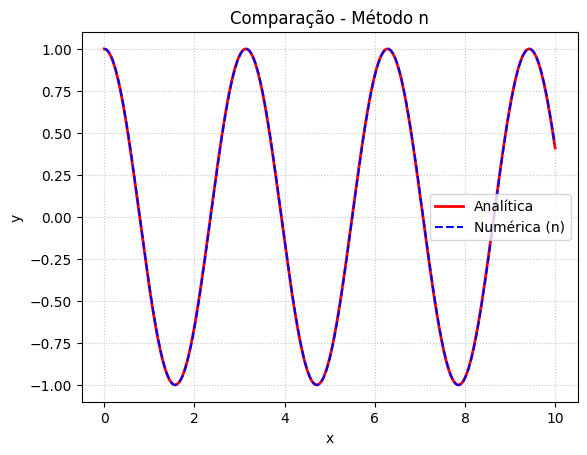

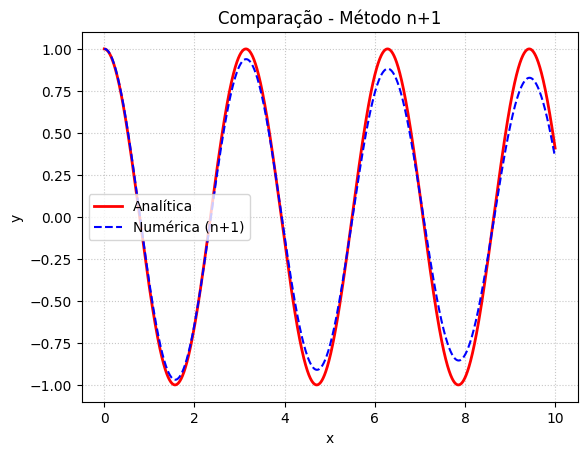

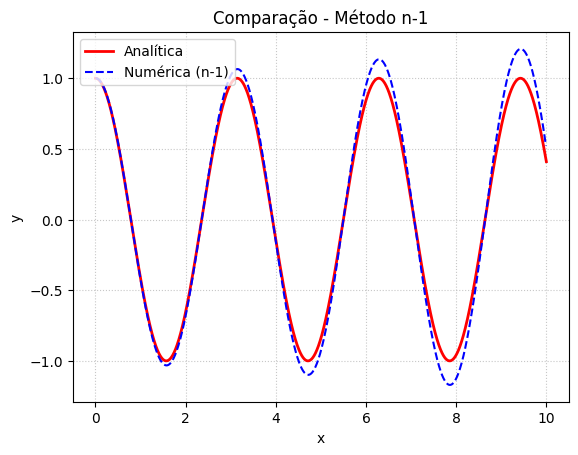

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Definição da EDO
# ==============================
def analytical_solution(x):
    """Solução analítica do PVI."""
    return np.cos(2 * x)

def numerical_method(h, method="n"):
    """
    Resolve a EDO y'' + 4y = 0 para diferentes aproximações:
    Euler = "n", "n+1" ou "n-1"
    """
    x = np.arange(0, 10, h)
    y = np.zeros(len(x))
    y[0] = 1
    y[1] = 1  # Euler inicial

    for i in range(2, len(x)):
        if method == "n":       # n*
            y[i] = (2 - 4*h**2) * y[i-1] - y[i-2]
        elif method == "n+1":
            y[i] = (2*y[i-1] - y[i-2]) / (1 + 4*h**2)
        elif method == "n-1":
            y[i] = 2*y[i-1] - (4*h**2 + 1) * y[i-2]
        else:
            raise ValueError("Método inválido. Use 'n', 'n+1' ou 'n-1'.")
    return x, y

# ==============================
# Plotagem
# ==============================
def plot_comparison(h, method):
    xa = np.arange(0, 10, 0.001)
    ya = analytical_solution(xa)
    xn, yn = numerical_method(h, method)

    plt.plot(xa, ya, label="Analítica", color='red', linewidth=2)
    plt.plot(xn, yn, label=f"Numérica ({method})", color='blue', linestyle='--', linewidth=1.5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Comparação - Método {method}")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

# ==============================
# Execução
# ==============================
plot_comparison(0.01, method="n")
plot_comparison(0.01, method="n+1")
plot_comparison(0.01, method="n-1")

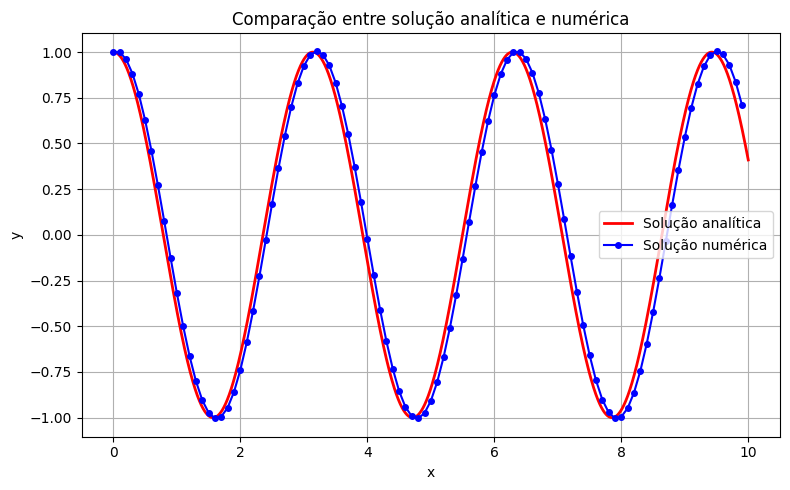

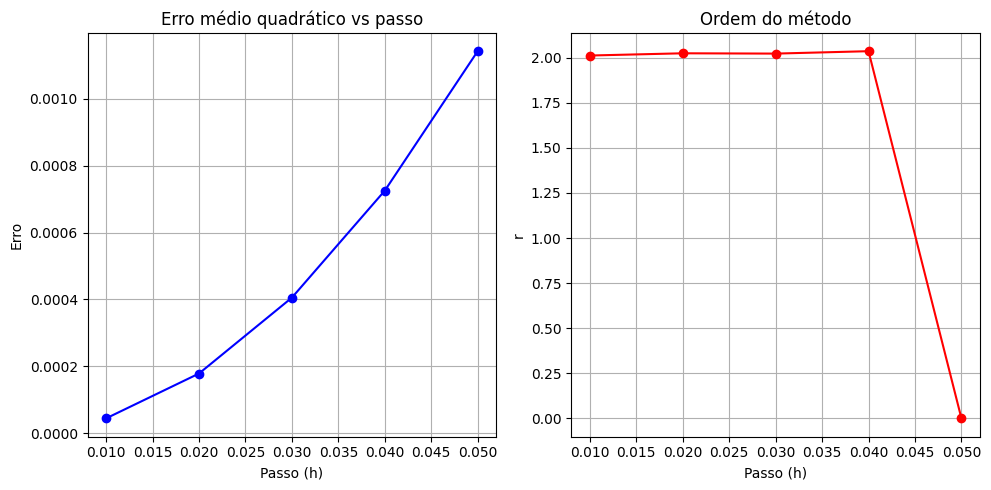

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ====================================================
# PARTE 1 - Comparação solução analítica vs numérica
# ====================================================

# Solução analítica: y(x) = cos(2x)
x_analitico = np.arange(0, 10, 0.001)
y_analitico = np.cos(2 * x_analitico)

# Parâmetros numéricos
passo = 0.1
x_numerico = np.arange(0, 10, passo)
y_numerico = np.zeros(len(x_numerico))

# C.I
y_numerico[0] = 1
y_numerico[1] = 1

# Iteração Central adicionando o método.
for i in range(2, len(x_numerico)):
    numerador = y_numerico[i-1] * (2 - 2 * passo**2) \
              - y_numerico[i-2] * (1 + passo**2)
    y_numerico[i] = numerador / (1 + passo**2)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_analitico, y_analitico, color='red', label='Solução analítica', linewidth=2)
plt.plot(x_numerico, y_numerico, 'o-', color='blue', label='Solução numérica', markersize=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparação entre solução analítica e numérica')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ====================================================
# PARTE 2 - Erro e ordem para diferentes passos
# ====================================================

# Lista de passos de integração
passos = [0.01, 0.02, 0.03, 0.04, 0.05]

erros = np.zeros(len(passos))
ordens = np.zeros(len(passos))

for idx, h in enumerate(passos):
    x_vals = np.arange(0, 2, h)
    y_vals = np.zeros(len(x_vals))
    y_vals[0] = 1
    y_vals[1] = 1

    # Iteração do método para cada passo
    for j in range(2, len(x_vals)):
        numerador = y_vals[j-1] * (2 - 2 * h**2) \
                  - y_vals[j-2] * (1 + h**2)
        y_vals[j] = numerador / (1 + h**2)

    # Erro médio quadrático
    erros[idx] = np.mean((np.cos(2 * x_vals) - y_vals)**2)

# Cálculo da ordem do método
for i in range(len(passos) - 1):
    ordens[i] = np.log(erros[i+1] / erros[i]) / np.log(passos[i+1] / passos[i])

# Plots
plt.figure(figsize=(10, 5))

# Erro
plt.subplot(1, 2, 1)
plt.plot(passos, erros, 'bo-', linewidth=1.5)
plt.title("Erro médio quadrático vs passo")
plt.xlabel("Passo (h)")
plt.ylabel("Erro")
plt.grid(True)

# Ordem
plt.subplot(1, 2, 2)
plt.plot(passos, ordens, 'ro-', linewidth=1.5)
plt.title("Ordem do método")
plt.xlabel("Passo (h)")
plt.ylabel("r")
plt.grid(True)

plt.tight_layout()
plt.show()
